In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df= pd.read_csv('metadata.csv')
df_binary=df[['smoke', 'drink', 'pesticide', 'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water', 'has_sewage_system', 'itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation', 'biopsed']]
df.dropna(inplace=True)
df['img_id'].to_csv('pictures')

In [ ]:
df.tail(15)

PAT_987_1859_859

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
2275,PAT_190,291,False,False,POMERANIA,POMERANIA,61,True,MALE,False,...,9.0,BCC,True,True,True,False,True,False,PAT_190_291_366.png,True
2276,PAT_830,1564,True,True,ITALY,GERMANY,84,False,MALE,True,...,7.0,BCC,True,UNK,False,UNK,False,True,PAT_830_1564_740.png,True
2277,PAT_360,742,True,True,ITALY,ITALY,68,False,MALE,True,...,8.0,SCC,True,True,False,False,False,True,PAT_360_742_768.png,True
2280,PAT_681,1299,True,False,UNK,SPAIN,71,True,MALE,True,...,5.0,BCC,False,UNK,False,UNK,False,True,PAT_681_1299_458.png,True
2281,PAT_747,1409,False,False,UNK,BRAZIL,55,False,MALE,True,...,10.0,ACK,True,True,False,False,True,True,PAT_747_1409_466.png,True
2282,PAT_136,203,False,False,UNK,UNK,60,False,FEMALE,False,...,5.0,BCC,False,UNK,False,UNK,False,True,PAT_136_203_436.png,True
2284,PAT_498,944,False,True,POMERANIA,POMERANIA,60,True,FEMALE,True,...,2.0,ACK,False,False,False,False,False,False,PAT_498_944_488.png,True
2285,PAT_492,937,False,True,POMERANIA,POMERANIA,70,False,MALE,False,...,13.0,SCC,False,True,False,False,False,True,PAT_492_937_43.png,True
2286,PAT_414,822,False,False,UNK,ITALY,20,True,FEMALE,False,...,2.0,ACK,False,False,False,False,False,True,PAT_414_822_420.png,True
2287,PAT_754,1429,False,False,ITALY,GERMANY,75,False,MALE,True,...,34.0,MEL,False,True,False,False,False,False,PAT_754_1429_380.png,True


In [53]:
def binarise(df, col):
    for columns in col:
        df[columns]= np.where(df[columns]==True, 1, 0)
    return df

col_bool=['smoke', 'drink', 'pesticide', 'skin_cancer_history', 'cancer_history', 'has_piped_water', 'has_sewage_system','biopsed']
binarise(df, col_bool)

def binarise_str(df, col):
    for columns in col:
        df[columns]=np.where(df[columns]=='True',1,0)
    return df

col_str=['itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation']
binarise_str(df, col_str)

df['gender']= np.where(df['gender']=='FEMALE', 1, 0)
df['diagnostic']=np.where((df['diagnostic']=='BCC') ^ (df['diagnostic']=='MEL') ^ (df['diagnostic']=='SCC'), 1, 0)
df

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
1,PAT_46,881,0,0,POMERANIA,POMERANIA,55,0,1,1,...,5.0,1,1,1,0,1,1,1,PAT_46_881_939.png,1
4,PAT_684,1302,0,1,POMERANIA,POMERANIA,79,0,0,1,...,5.0,1,1,1,0,0,1,1,PAT_684_1302_588.png,1
6,PAT_778,1471,0,1,GERMANY,ITALY,52,0,1,0,...,10.0,1,0,1,0,1,1,1,PAT_778_1471_835.png,1
7,PAT_117,179,0,0,POMERANIA,POMERANIA,74,1,1,0,...,10.0,1,1,1,1,0,1,1,PAT_117_179_983.png,1
9,PAT_705,4015,0,1,GERMANY,GERMANY,58,1,1,1,...,7.0,0,0,1,0,0,0,0,PAT_705_4015_413.png,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,PAT_386,785,1,0,POMERANIA,POMERANIA,66,0,0,1,...,15.0,0,1,0,1,0,1,1,PAT_386_785_536.png,1
2291,PAT_273,421,0,0,POMERANIA,POMERANIA,41,1,0,0,...,5.0,1,1,0,1,0,1,1,PAT_273_421_905.png,1
2292,PAT_491,934,0,0,POMERANIA,POMERANIA,43,1,1,1,...,5.0,1,1,0,0,0,1,1,PAT_491_934_46.png,1
2294,PAT_46,880,0,0,POMERANIA,POMERANIA,55,0,1,1,...,12.0,1,1,1,0,1,0,0,PAT_46_880_140.png,1


In [77]:
df.tail(15)

,smoke,drink,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,age_norm
2275,0,0,61,1,0,0,1,1,0,1,15.0,9.0,1,1,1,1,0,1,0,0.592593
2276,1,1,84,0,0,1,0,0,0,3,7.0,7.0,1,1,0,0,0,0,1,0.876543
2277,1,1,68,0,0,1,1,0,0,1,10.0,8.0,1,1,1,0,0,0,1,0.679012
2280,1,0,71,1,0,1,0,1,0,13,5.0,5.0,1,0,0,0,0,0,1,0.716049
2281,0,0,55,0,0,1,0,1,1,1,15.0,10.0,0,1,1,0,0,1,1,0.518519
2282,0,0,60,0,1,0,1,1,1,3,5.0,5.0,1,0,0,0,0,0,1,0.580247
2284,0,1,60,1,1,1,0,0,0,2,4.0,2.0,0,0,0,0,0,0,0,0.580247
2285,0,1,70,0,0,0,0,0,0,4,18.0,13.0,1,0,1,0,0,0,1,0.703704
2286,0,0,20,1,1,0,0,0,0,7,4.0,2.0,0,0,0,0,0,0,1,0.086420
2287,0,0,75,0,0,1,0,1,1,1,40.0,34.0,1,0,1,0,0,0,0,0.765432


In [54]:
columns_to_drop=['img_id', 'background_father', 'background_mother', 'lesion_id', 'patient_id', 'biopsed', 'fitspatrick'] #fitspatrick removed because of underrepresentation of darker skin tones, the person rated 6 is not even black 
df= df.drop(columns=columns_to_drop)

#df['region'].value_counts()
#df_dummy = pd.get_dummies(df, columns=['region'])  # One-hot encoding for location


In [55]:
df

#KNN - change age to be between (0, 1), 
#combine water and sewage to 1 feature because of correlation

,smoke,drink,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation
1,0,0,55,0,1,1,1,1,1,NECK,6.0,5.0,1,1,1,0,1,1,1
4,0,1,79,0,0,1,0,0,0,FOREARM,5.0,5.0,1,1,1,0,0,1,1
6,0,1,52,0,1,0,1,1,1,FACE,15.0,10.0,1,0,1,0,1,1,1
7,0,0,74,1,1,0,0,0,0,FACE,15.0,10.0,1,1,1,1,0,1,1
9,0,1,58,1,1,1,1,1,1,FOREARM,9.0,7.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,1,0,66,0,0,1,0,1,1,EAR,20.0,15.0,0,1,0,1,0,1,1
2291,0,0,41,1,0,0,0,0,0,FACE,9.0,5.0,1,1,0,1,0,1,1
2292,0,0,43,1,1,1,1,0,0,FACE,9.0,5.0,1,1,0,0,0,1,1
2294,0,0,55,0,1,1,1,1,1,CHEST,13.0,12.0,1,1,1,0,1,0,0


In [56]:
#df['region2'] = df['region'].map({'FACE': 0, 'CHEST': 1, 'FOREARM':2})

df['region'], uniques = pd.factorize(df['region']) #assigned numbers 1-13 to regions (1=forearm, 2 = face, ...)

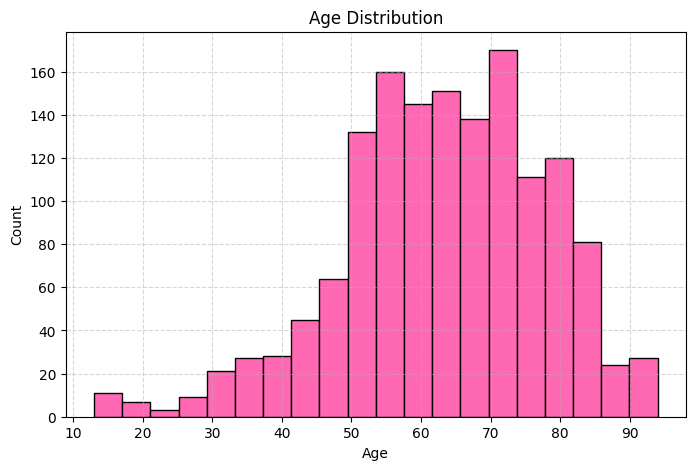

In [ ]:
import matplotlib.pyplot as plt

def plot_age_histogram(df, bins=30, color='skyblue'):
    # Drop missing values to avoid errors
    age_data = df['age'].dropna()

    plt.figure(figsize=(8, 5))
    plt.hist(age_data, bins=bins, color=color, edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

plot_age_histogram(df, bins=20, color='hotpink')



In [75]:
#binarising age:
def normalize_age(age, min_age, max_age):
    scaled = (age - min_age) / (max_age - min_age)
    return max(0.0, min(1.0, scaled))  # clip between 0 and 1

min_age = df['age'].min()
max_age = df['age'].max()

df['age_norm'] = df['age'].apply(lambda x: normalize_age(x, min_age, max_age))

In [74]:
df

,smoke,drink,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,age_norm
1,0,0,55,0,1,1,1,1,1,0,6.0,5.0,1,1,1,0,1,1,1,0.518519
4,0,1,79,0,0,1,0,0,0,1,5.0,5.0,1,1,1,0,0,1,1,0.814815
6,0,1,52,0,1,0,1,1,1,2,15.0,10.0,1,0,1,0,1,1,1,0.481481
7,0,0,74,1,1,0,0,0,0,2,15.0,10.0,1,1,1,1,0,1,1,0.753086
9,0,1,58,1,1,1,1,1,1,1,9.0,7.0,0,0,1,0,0,0,0,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,1,0,66,0,0,1,0,1,1,6,20.0,15.0,0,1,0,1,0,1,1,0.654321
2291,0,0,41,1,0,0,0,0,0,2,9.0,5.0,1,1,0,1,0,1,1,0.345679
2292,0,0,43,1,1,1,1,0,0,2,9.0,5.0,1,1,0,0,0,1,1,0.370370
2294,0,0,55,0,1,1,1,1,1,4,13.0,12.0,1,1,1,0,1,0,0,0.518519


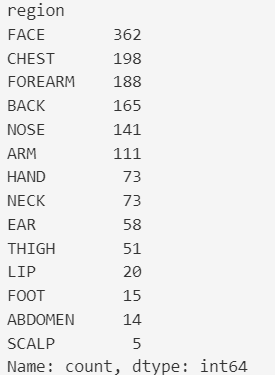

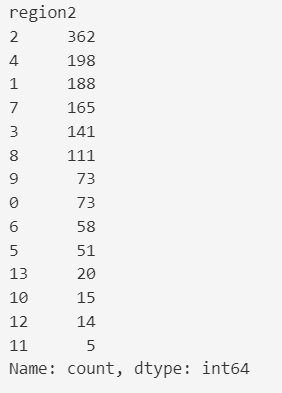

In [ ]:
df

#Best performing features: elevation, bleed, changed, smoke, grew, hurt, fitspat

Model1 - Random forest

In [10]:
df.to_csv("metadata_adjusted.csv", index=False, encoding='utf-8', sep=',')

In [76]:
import os
print(os.getcwd())

c:\Users\Mirka Gemelova\OneDrive - ITU\Dokumenty\ITU\DS_project\2025-FYP-groupG\important files to be deleted
